# Testing correlation between employee counts and # facilities

In [63]:
import pandas as pd 
from pandas import read_csv
import numpy as np
from sklearn.linear_model import LinearRegression
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sn


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [384]:
# Group A
groupA=pd.read_csv("CompleteSet_GroupA.csv")
groupA=groupA.drop("Unnamed: 0",axis=1)
#Strip all leading whitespace in Area column
groupA['Area'] = groupA['Area'].apply(lambda x: x.strip())

#Filter only for 2006, 2013 and 2018
groupA = groupA.loc[(groupA['Year'] == 2006) | (groupA['Year'] == 2013)| (groupA['Year']==2018)]

#Remove total NZ row
groupA = groupA.loc[(groupA['Area'] != "Total NZ by Regional Council/Statistical Area")]

#Remove total regions
groupA = groupA.loc[(groupA['ParentArea'] != "NewZealand")]

#Only a certain region
#groupA = groupA.loc[(groupA['ParentArea'] == "AucklandRegion")] #Only Auckland
#groupA = groupA.loc[(groupA['ParentArea'] == "WaikatoRegion")] #Only Waikato
#groupA = groupA.loc[(groupA['ParentArea'] == "WellingtonRegion")] #Only Wellington
#groupA = groupA.loc[(groupA['ParentArea'] == "OtagoRegion")] #Only Otago
#groupA = groupA.loc[(groupA['ParentArea'] == "BayOfPlentyRegion")] #Only BayOfPlenty

#fill in nans caused
groupA=groupA.fillna(0)

Useful websites
 * https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn
 * https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

## Total industry

### Scatterplot

In [385]:
totInd_Fac_2006 = np.array(groupA.loc[(groupA['Year'] == 2006)].TotInd_GeogUnits.tolist())
totInd_Emp_2006 = np.array(groupA.loc[(groupA['Year'] == 2006)].TotInd_EmpCo.tolist())

totInd_Fac_2013 = np.array(groupA.loc[(groupA['Year'] == 2013)].TotInd_GeogUnits.tolist())
totInd_Emp_2013 = np.array(groupA.loc[(groupA['Year'] == 2013)].TotInd_EmpCo.tolist())

totInd_Fac_2018 = np.array(groupA.loc[(groupA['Year'] == 2018)].TotInd_GeogUnits.tolist())
totInd_Emp_2018 = np.array(groupA.loc[(groupA['Year'] == 2018)].TotInd_EmpCo.tolist())

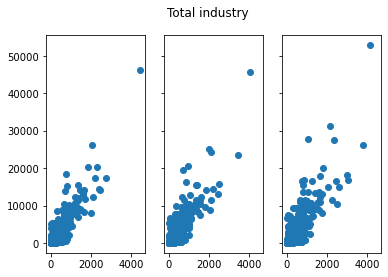

In [386]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Total industry')
ax1.scatter(totInd_Fac_2006, totInd_Emp_2006)
ax2.scatter(totInd_Fac_2013, totInd_Emp_2013)
ax3.scatter(totInd_Fac_2018, totInd_Emp_2018)


### Correlation tests

In [387]:
# Covariance

print("2006")
covariance = np.cov([totInd_Fac_2006], [totInd_Emp_2006])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(totInd_Fac_2006, totInd_Emp_2006)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(totInd_Fac_2006, totInd_Emp_2006)
print('Spearmans correlation: %.3f' % corrS)

print("2013")
covariance = np.cov([totInd_Fac_2013], [totInd_Emp_2013])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(totInd_Fac_2013, totInd_Emp_2013)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(totInd_Fac_2013, totInd_Emp_2013)
print('Spearmans correlation: %.3f' % corrS)

print("2018")
covariance = np.cov([totInd_Fac_2018], [totInd_Emp_2018])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(totInd_Fac_2018, totInd_Emp_2018)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(totInd_Fac_2018, totInd_Emp_2018)
print('Spearmans correlation: %.3f' % corrS)

2006
[[  63821.99537761  459649.34012556]
 [ 459649.34012556 4722061.97057833]]
Pearsons correlation: 0.837
Spearmans correlation: 0.670
2013
[[  63805.15555391  451487.78630134]
 [ 451487.78630134 4909880.55159985]]
Pearsons correlation: 0.807
Spearmans correlation: 0.654
2018
[[  78309.20740768  567092.2623912 ]
 [ 567092.2623912  6495162.66847209]]
Pearsons correlation: 0.795
Spearmans correlation: 0.660


### Linear regression
regressor - # Facilities ; predictor - employee count

In [388]:
totInd_Fac_2006 = totInd_Fac_2006.reshape((-1, 1))
totInd_Fac_2013 = totInd_Fac_2013.reshape((-1, 1))
totInd_Fac_2018 = totInd_Fac_2018.reshape((-1, 1))

### Create model

In [389]:
model_2006 = LinearRegression().fit(totInd_Fac_2006, totInd_Emp_2006)
model_2013 = LinearRegression().fit(totInd_Fac_2013, totInd_Emp_2013)
model_2018 = LinearRegression().fit(totInd_Fac_2018, totInd_Emp_2018)

In [390]:
print("2006")
r_sq = model_2006.score(totInd_Fac_2006, totInd_Emp_2006)
print('coefficient of determination:', r_sq)
print('intercept:', model_2006.intercept_)
print('slope:', model_2006.coef_)


print("2013")
r_sq = model_2013.score(totInd_Fac_2013, totInd_Emp_2013)
print('coefficient of determination:', r_sq)
print('intercept:', model_2013.intercept_)
print('slope:', model_2013.coef_)


print("2018")
r_sq = model_2018.score(totInd_Fac_2018, totInd_Emp_2018)
print('coefficient of determination:', r_sq)
print('intercept:', model_2018.intercept_)
print('slope:', model_2018.coef_)

2006
coefficient of determination: 0.7010535962548646
intercept: -751.3062256459226
slope: [7.20205217]
2013
coefficient of determination: 0.650676787761086
intercept: -762.5558608544247
slope: [7.07603927]
2018
coefficient of determination: 0.6322729216741214
intercept: -866.8409294414419
slope: [7.24170607]


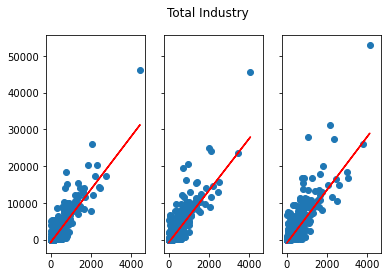

In [391]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Total Industry')
ax1.scatter(totInd_Fac_2006, totInd_Emp_2006)
ax1.plot(totInd_Fac_2006,model_2006.coef_*totInd_Fac_2006+model_2006.intercept_,'r')
ax2.scatter(totInd_Fac_2013, totInd_Emp_2013)
ax2.plot(totInd_Fac_2013,model_2013.coef_*totInd_Fac_2013+model_2013.intercept_,'r')
ax3.scatter(totInd_Fac_2018, totInd_Emp_2018)
ax3.plot(totInd_Fac_2018,model_2018.coef_*totInd_Fac_2018+model_2018.intercept_,'r')

## Wholesale (F)

### Scatterplot

In [392]:
whole_Fac_2006 = np.array(groupA.loc[(groupA['Year'] == 2006)].F_GeogUnits.tolist())
whole_Emp_2006 = np.array(groupA.loc[(groupA['Year'] == 2006)].F_EmpCo.tolist())

whole_Fac_2013 = np.array(groupA.loc[(groupA['Year'] == 2013)].F_GeogUnits.tolist())
whole_Emp_2013 = np.array(groupA.loc[(groupA['Year'] == 2013)].F_EmpCo.tolist())

whole_Fac_2018 = np.array(groupA.loc[(groupA['Year'] == 2018)].F_GeogUnits.tolist())
whole_Emp_2018 = np.array(groupA.loc[(groupA['Year'] == 2018)].F_EmpCo.tolist())

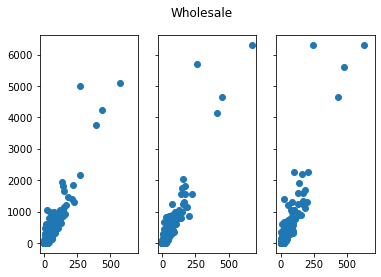

In [393]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Wholesale')
ax1.scatter(whole_Fac_2006, whole_Emp_2006)
ax2.scatter(whole_Fac_2013, whole_Emp_2013)
ax3.scatter(whole_Fac_2018, whole_Emp_2018)

### Correlation tests

In [394]:
# Covariance

print("2006")
covariance = np.cov([whole_Fac_2006], [whole_Emp_2006])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(whole_Fac_2006, whole_Emp_2006)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(whole_Fac_2006, whole_Emp_2006)
print('Spearmans correlation: %.3f' % corrS)

print("2013")
covariance = np.cov([whole_Fac_2013], [whole_Emp_2013])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(whole_Fac_2013, whole_Emp_2013)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(whole_Fac_2013, whole_Emp_2013)
print('Spearmans correlation: %.3f' % corrS)

print("2018")
covariance = np.cov([whole_Fac_2018], [whole_Emp_2018])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(whole_Fac_2018, whole_Emp_2018)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(whole_Fac_2018, whole_Emp_2018)
print('Spearmans correlation: %.3f' % corrS)

2006
[[  676.85589466  5945.02341445]
 [ 5945.02341445 60615.22738291]]
Pearsons correlation: 0.928
Spearmans correlation: 0.696
2013
[[  702.25644283  6528.52540835]
 [ 6528.52540835 70827.38072192]]
Pearsons correlation: 0.926
Spearmans correlation: 0.699
2018
[[  700.7107004   7121.56176834]
 [ 7121.56176834 86738.44148219]]
Pearsons correlation: 0.913
Spearmans correlation: 0.717


### Linear regression
regressor - # Facilities ; predictor - employee count

### Create model

In [395]:
whole_Fac_2006 = whole_Fac_2006.reshape((-1, 1))
whole_Fac_2013 = whole_Fac_2013.reshape((-1, 1))
whole_Fac_2018 = whole_Fac_2018.reshape((-1, 1))

In [396]:
model_2006 = LinearRegression().fit(whole_Fac_2006, whole_Emp_2006)
model_2013 = LinearRegression().fit(whole_Fac_2013, whole_Emp_2013)
model_2018 = LinearRegression().fit(whole_Fac_2018, whole_Emp_2018)

In [397]:
print("2006")
r_sq = model_2006.score(whole_Fac_2006, whole_Emp_2006)
print('coefficient of determination:', r_sq)
print('intercept:', model_2006.intercept_)
print('slope:', model_2006.coef_)


print("2013")
r_sq = model_2013.score(whole_Fac_2013, whole_Emp_2013)
print('coefficient of determination:', r_sq)
print('intercept:', model_2013.intercept_)
print('slope:', model_2013.coef_)


print("2018")
r_sq = model_2018.score(whole_Fac_2018, whole_Emp_2018)
print('coefficient of determination:', r_sq)
print('intercept:', model_2018.intercept_)
print('slope:', model_2018.coef_)

2006
coefficient of determination: 0.8614482333943669
intercept: -38.836586124757545
slope: [8.78329266]
2013
coefficient of determination: 0.8569061971531925
intercept: -38.468513862366784
slope: [9.2964977]
2018
coefficient of determination: 0.8344496308942759
intercept: -43.90684776810022
slope: [10.16334097]


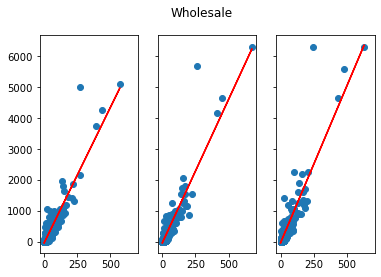

In [398]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Wholesale')
ax1.scatter(whole_Fac_2006, whole_Emp_2006)
ax1.plot(whole_Fac_2006,model_2006.coef_*whole_Fac_2006+model_2006.intercept_,'r')
ax2.scatter(whole_Fac_2013, whole_Emp_2013)
ax2.plot(whole_Fac_2013,model_2013.coef_*whole_Fac_2013+model_2013.intercept_,'r')
ax3.scatter(whole_Fac_2018, whole_Emp_2018)
ax3.plot(whole_Fac_2018,model_2018.coef_*whole_Fac_2018+model_2018.intercept_,'r')

## Retail (G)

### Scatterplot

In [399]:
retail_Fac_2006 = np.array(groupA.loc[(groupA['Year'] == 2006)].G_GeogUnits.tolist())
retail_Emp_2006 = np.array(groupA.loc[(groupA['Year'] == 2006)].G_EmpCo.tolist())

retail_Fac_2013 = np.array(groupA.loc[(groupA['Year'] == 2013)].G_GeogUnits.tolist())
retail_Emp_2013 = np.array(groupA.loc[(groupA['Year'] == 2013)].G_EmpCo.tolist())

retail_Fac_2018 = np.array(groupA.loc[(groupA['Year'] == 2018)].G_GeogUnits.tolist())
retail_Emp_2018 = np.array(groupA.loc[(groupA['Year'] == 2018)].G_EmpCo.tolist())

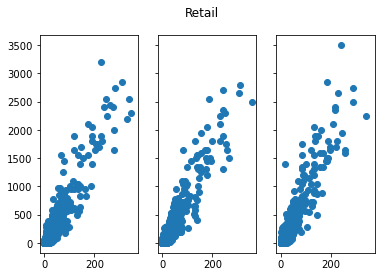

In [400]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Retail')
ax1.scatter(retail_Fac_2006, retail_Emp_2006)
ax2.scatter(retail_Fac_2013, retail_Emp_2013)
ax3.scatter(retail_Fac_2018, retail_Emp_2018)

### Correlation tests

In [401]:
# Covariance

print("2006")
covariance = np.cov([retail_Fac_2006], [retail_Emp_2006])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(retail_Fac_2006, retail_Emp_2006)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(retail_Fac_2006, retail_Emp_2006)
print('Spearmans correlation: %.3f' % corrS)

print("2013")
covariance = np.cov([retail_Fac_2013], [retail_Emp_2013])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(retail_Fac_2013, retail_Emp_2013)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(retail_Fac_2013, retail_Emp_2013)
print('Spearmans correlation: %.3f' % corrS)

print("2018")
covariance = np.cov([retail_Fac_2018], [retail_Emp_2018])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(retail_Fac_2018, retail_Emp_2018)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(retail_Fac_2018, retail_Emp_2018)
print('Spearmans correlation: %.3f' % corrS)

2006
[[ 1010.95907997  8400.79329667]
 [ 8400.79329667 79067.27787984]]
Pearsons correlation: 0.940
Spearmans correlation: 0.810
2013
[[  920.61285603  7608.75354951]
 [ 7608.75354951 71613.8512875 ]]
Pearsons correlation: 0.937
Spearmans correlation: 0.800
2018
[[  868.78953665  7785.30125128]
 [ 7785.30125128 82127.61014276]]
Pearsons correlation: 0.922
Spearmans correlation: 0.807


### Linear regression
regressor - # Facilities ; predictor - employee count

### Create model

In [402]:
retail_Fac_2006 = retail_Fac_2006.reshape((-1, 1))
retail_Fac_2013 = retail_Fac_2013.reshape((-1, 1))
retail_Fac_2018 = retail_Fac_2018.reshape((-1, 1))

In [403]:
model_2006 = LinearRegression().fit(retail_Fac_2006, retail_Emp_2006)
model_2013 = LinearRegression().fit(retail_Fac_2013, retail_Emp_2013)
model_2018 = LinearRegression().fit(retail_Fac_2018, retail_Emp_2018)

In [404]:
print("2006")
r_sq = model_2006.score(retail_Fac_2006, retail_Emp_2006)
print('coefficient of determination:', r_sq)
print('intercept:', model_2006.intercept_)
print('slope:', model_2006.coef_)


print("2013")
r_sq = model_2013.score(retail_Fac_2013, retail_Emp_2013)
print('coefficient of determination:', r_sq)
print('intercept:', model_2013.intercept_)
print('slope:', model_2013.coef_)


print("2018")
r_sq = model_2018.score(retail_Fac_2018, retail_Emp_2018)
print('coefficient of determination:', r_sq)
print('intercept:', model_2018.intercept_)
print('slope:', model_2018.coef_)

2006
coefficient of determination: 0.882897390882004
intercept: -34.94154563769865
slope: [8.30972634]
2013
coefficient of determination: 0.8781181813717782
intercept: -37.685165049048294
slope: [8.26487866]
2018
coefficient of determination: 0.8494681054088666
intercept: -45.68184588615922
slope: [8.96109003]


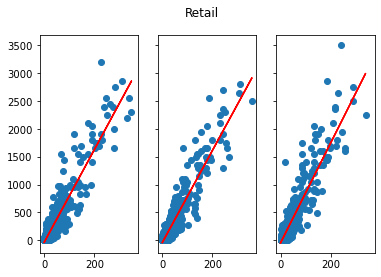

In [405]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Retail')
ax1.scatter(retail_Fac_2006, retail_Emp_2006)
ax1.plot(retail_Fac_2006,model_2006.coef_*retail_Fac_2006+model_2006.intercept_,'r')
ax2.scatter(retail_Fac_2013, retail_Emp_2013)
ax2.plot(retail_Fac_2013,model_2013.coef_*retail_Fac_2013+model_2013.intercept_,'r')
ax3.scatter(retail_Fac_2018, retail_Emp_2018)
ax3.plot(retail_Fac_2018,model_2018.coef_*retail_Fac_2018+model_2018.intercept_,'r')

## TransPostWare 

In [406]:
groupA['TransPostWare_GeogUnits']=groupA['I461_GeogUnits']+groupA['I471_GeogUnits']+groupA['I481_GeogUnits']+groupA['I51_GeogUnits']+groupA['I53_GeogUnits']
groupA['TransPostWare_EmpCo']=groupA['I461_EmpCo']+groupA['I471_EmpCo']+groupA['I481_EmpCo']+groupA['I51_EmpCo']+groupA['I53_EmpCo']

### Scatterplot

In [407]:
tpw_Fac_2006 = np.array(groupA.loc[(groupA['Year'] == 2006)].TransPostWare_GeogUnits.tolist())
tpw_Emp_2006 = np.array(groupA.loc[(groupA['Year'] == 2006)].TransPostWare_EmpCo.tolist())

tpw_Fac_2013 = np.array(groupA.loc[(groupA['Year'] == 2013)].TransPostWare_GeogUnits.tolist())
tpw_Emp_2013 = np.array(groupA.loc[(groupA['Year'] == 2013)].TransPostWare_EmpCo.tolist())

tpw_Fac_2018 = np.array(groupA.loc[(groupA['Year'] == 2018)].TransPostWare_GeogUnits.tolist())
tpw_Emp_2018 = np.array(groupA.loc[(groupA['Year'] == 2018)].TransPostWare_EmpCo.tolist())

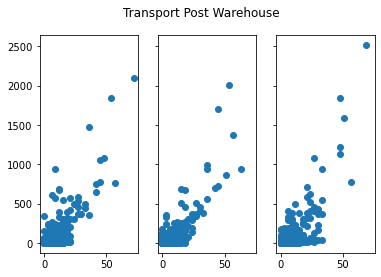

In [408]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Transport Post Warehouse')
ax1.scatter(tpw_Fac_2006, tpw_Emp_2006)
ax2.scatter(tpw_Fac_2013, tpw_Emp_2013)
ax3.scatter(tpw_Fac_2018, tpw_Emp_2018)

### Correlation tests

In [409]:
# Covariance

print("2006")
covariance = np.cov([tpw_Fac_2006], [tpw_Emp_2006])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(tpw_Fac_2006, tpw_Emp_2006)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(tpw_Fac_2006, tpw_Emp_2006)
print('Spearmans correlation: %.3f' % corrS)

print("2013")
covariance = np.cov([tpw_Fac_2013], [tpw_Emp_2013])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(tpw_Fac_2013, tpw_Emp_2013)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(tpw_Fac_2013, tpw_Emp_2013)
print('Spearmans correlation: %.3f' % corrS)

print("2018")
covariance = np.cov([tpw_Fac_2018], [tpw_Emp_2018])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(tpw_Fac_2018, tpw_Emp_2018)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(tpw_Fac_2018, tpw_Emp_2018)
print('Spearmans correlation: %.3f' % corrS)

2006
[[  28.2268047   341.54655728]
 [ 341.54655728 9829.42002667]]
Pearsons correlation: 0.648
Spearmans correlation: 0.546
2013
[[  26.23638653  315.18580565]
 [ 315.18580565 8154.84446008]]
Pearsons correlation: 0.681
Spearmans correlation: 0.562
2018
[[   29.29055521   355.58771806]
 [  355.58771806 10494.26540613]]
Pearsons correlation: 0.641
Spearmans correlation: 0.587


### Linear regression
regressor - # Facilities ; predictor - employee count

### Create model

In [410]:
tpw_Fac_2006 = tpw_Fac_2006.reshape((-1, 1))
tpw_Fac_2013 = tpw_Fac_2013.reshape((-1, 1))
tpw_Fac_2018 = tpw_Fac_2018.reshape((-1, 1))

In [411]:
model_2006 = LinearRegression().fit(tpw_Fac_2006, tpw_Emp_2006)
model_2013 = LinearRegression().fit(tpw_Fac_2013, tpw_Emp_2013)
model_2018 = LinearRegression().fit(tpw_Fac_2018, tpw_Emp_2018)

In [412]:
print("2006")
r_sq = model_2006.score(tpw_Fac_2006, tpw_Emp_2006)
print('coefficient of determination:', r_sq)
print('intercept:', model_2006.intercept_)
print('slope:', model_2006.coef_)


print("2013")
r_sq = model_2013.score(tpw_Fac_2013, tpw_Emp_2013)
print('coefficient of determination:', r_sq)
print('intercept:', model_2013.intercept_)
print('slope:', model_2013.coef_)


print("2018")
r_sq = model_2018.score(tpw_Fac_2018, tpw_Emp_2018)
print('coefficient of determination:', r_sq)
print('intercept:', model_2018.intercept_)
print('slope:', model_2018.coef_)

2006
coefficient of determination: 0.4204459876092096
intercept: -32.40580071657688
slope: [12.10007866]
2013
coefficient of determination: 0.46431594621250527
intercept: -30.53433569156313
slope: [12.01330851]
2018
coefficient of determination: 0.41135223072105087
intercept: -31.470859518848773
slope: [12.1400129]


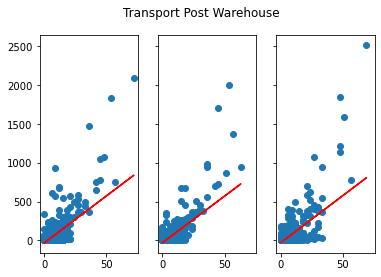

In [413]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Transport Post Warehouse')
ax1.scatter(tpw_Fac_2006, tpw_Emp_2006)
ax1.plot(tpw_Fac_2006,model_2006.coef_*tpw_Fac_2006+model_2006.intercept_,'r')
ax2.scatter(tpw_Fac_2013, tpw_Emp_2013)
ax2.plot(tpw_Fac_2013,model_2013.coef_*tpw_Fac_2013+model_2013.intercept_,'r')
ax3.scatter(tpw_Fac_2018, tpw_Emp_2018)
ax3.plot(tpw_Fac_2018,model_2018.coef_*tpw_Fac_2018+model_2018.intercept_,'r')


## Transport

In [414]:
groupA['Transport_GeogUnits']=groupA['I461_GeogUnits']+groupA['I471_GeogUnits']+groupA['I481_GeogUnits']
groupA['Transport_EmpCo']=groupA['I461_EmpCo']+groupA['I471_EmpCo']+groupA['I481_EmpCo']

### Scatterplot

In [415]:
trans_Fac_2006 = np.array(groupA.loc[(groupA['Year'] == 2006)].Transport_GeogUnits.tolist())
trans_Emp_2006 = np.array(groupA.loc[(groupA['Year'] == 2006)].Transport_EmpCo.tolist())

trans_Fac_2013 = np.array(groupA.loc[(groupA['Year'] == 2013)].Transport_GeogUnits.tolist())
trans_Emp_2013 = np.array(groupA.loc[(groupA['Year'] == 2013)].Transport_EmpCo.tolist())

trans_Fac_2018 = np.array(groupA.loc[(groupA['Year'] == 2018)].Transport_GeogUnits.tolist())
trans_Emp_2018 = np.array(groupA.loc[(groupA['Year'] == 2018)].Transport_EmpCo.tolist())

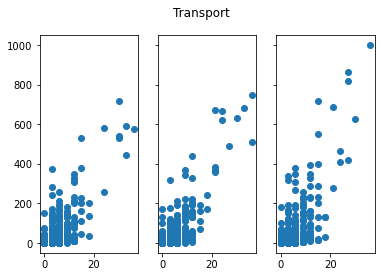

In [416]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Transport')
ax1.scatter(trans_Fac_2006, trans_Emp_2006)
ax2.scatter(trans_Fac_2013, trans_Emp_2013)
ax3.scatter(trans_Fac_2018, trans_Emp_2018)

### Correlation tests

In [417]:
# Covariance

print("2006")
covariance = np.cov([trans_Fac_2006], [trans_Emp_2006])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(trans_Fac_2006, trans_Emp_2006)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(trans_Fac_2006, trans_Emp_2006)
print('Spearmans correlation: %.3f' % corrS)

print("2013")
covariance = np.cov([trans_Fac_2013], [trans_Emp_2013])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(trans_Fac_2013, trans_Emp_2013)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(trans_Fac_2013, trans_Emp_2013)
print('Spearmans correlation: %.3f' % corrS)

print("2018")
covariance = np.cov([trans_Fac_2018], [trans_Emp_2018])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(trans_Fac_2018, trans_Emp_2018)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(trans_Fac_2018, trans_Emp_2018)
print('Spearmans correlation: %.3f' % corrS)

2006
[[  11.29891107   95.36947541]
 [  95.36947541 2133.71605409]]
Pearsons correlation: 0.614
Spearmans correlation: 0.588
2013
[[  10.39535538  107.89695359]
 [ 107.89695359 2442.17822142]]
Pearsons correlation: 0.677
Spearmans correlation: 0.610
2018
[[  10.62066002  115.91375977]
 [ 115.91375977 3285.07483899]]
Pearsons correlation: 0.621
Spearmans correlation: 0.610


### Linear regression
regressor - # Facilities ; predictor - employee count

### Create model

In [418]:
trans_Fac_2006 = trans_Fac_2006.reshape((-1, 1))
trans_Fac_2013 = trans_Fac_2013.reshape((-1, 1))
trans_Fac_2018 = trans_Fac_2018.reshape((-1, 1))

In [419]:
model_2006 = LinearRegression().fit(trans_Fac_2006, trans_Emp_2006)
model_2013 = LinearRegression().fit(trans_Fac_2013, trans_Emp_2013)
model_2018 = LinearRegression().fit(trans_Fac_2018, trans_Emp_2018)

In [420]:
print("2006")
r_sq = model_2006.score(trans_Fac_2006, trans_Emp_2006)
print('coefficient of determination:', r_sq)
print('intercept:', model_2006.intercept_)
print('slope:', model_2006.coef_)


print("2013")
r_sq = model_2013.score(trans_Fac_2013, trans_Emp_2013)
print('coefficient of determination:', r_sq)
print('intercept:', model_2013.intercept_)
print('slope:', model_2013.coef_)


print("2018")
r_sq = model_2018.score(trans_Fac_2018, trans_Emp_2018)
print('coefficient of determination:', r_sq)
print('intercept:', model_2018.intercept_)
print('slope:', model_2018.coef_)

2006
coefficient of determination: 0.37726417988141026
intercept: -9.262765304975147
slope: [8.44058997]
2013
coefficient of determination: 0.45856580925789914
intercept: -11.178398064306018
slope: [10.37934247]
2018
coefficient of determination: 0.3850997269925057
intercept: -10.908135109950486
slope: [10.91398835]


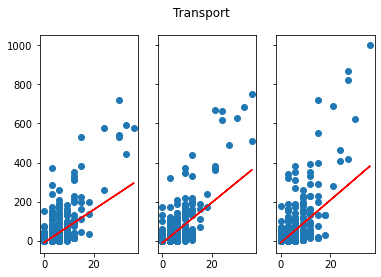

In [421]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Transport')
ax1.scatter(trans_Fac_2006, trans_Emp_2006)
ax1.plot(trans_Fac_2006,model_2006.coef_*trans_Fac_2006+model_2006.intercept_,'r')
ax2.scatter(trans_Fac_2013, trans_Emp_2013)
ax2.plot(trans_Fac_2013,model_2013.coef_*trans_Fac_2013+model_2013.intercept_,'r')
ax3.scatter(trans_Fac_2018, trans_Emp_2018)
ax3.plot(trans_Fac_2018,model_2018.coef_*trans_Fac_2018+model_2018.intercept_,'r')


## Post and storage

In [422]:
groupA['Storage_GeogUnits']=groupA['I51_GeogUnits']+groupA['I53_GeogUnits']
groupA['Storage_EmpCo']=groupA['I51_EmpCo']+groupA['I53_EmpCo']

### Scatterplot

In [423]:
stor_Fac_2006 = np.array(groupA.loc[(groupA['Year'] == 2006)].Storage_GeogUnits.tolist())
stor_Emp_2006 = np.array(groupA.loc[(groupA['Year'] == 2006)].Storage_EmpCo.tolist())

stor_Fac_2013 = np.array(groupA.loc[(groupA['Year'] == 2013)].Storage_GeogUnits.tolist())
stor_Emp_2013 = np.array(groupA.loc[(groupA['Year'] == 2013)].Storage_EmpCo.tolist())

stor_Fac_2018 = np.array(groupA.loc[(groupA['Year'] == 2018)].Storage_GeogUnits.tolist())
stor_Emp_2018 = np.array(groupA.loc[(groupA['Year'] == 2018)].Storage_EmpCo.tolist())

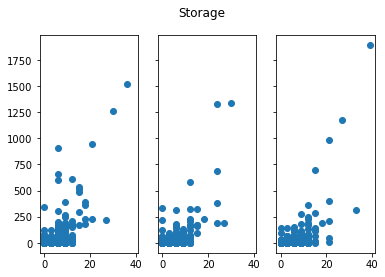

In [424]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Storage')
ax1.scatter(stor_Fac_2006, stor_Emp_2006)
ax2.scatter(stor_Fac_2013, stor_Emp_2013)
ax3.scatter(stor_Fac_2018, stor_Emp_2018)

### Correlation tests

In [425]:
# Covariance

print("2006")
covariance = np.cov([stor_Fac_2006], [stor_Emp_2006])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(stor_Fac_2006, stor_Emp_2006)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(stor_Fac_2006, stor_Emp_2006)
print('Spearmans correlation: %.3f' % corrS)

print("2013")
covariance = np.cov([stor_Fac_2013], [stor_Emp_2013])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(stor_Fac_2013, stor_Emp_2013)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(stor_Fac_2013, stor_Emp_2013)
print('Spearmans correlation: %.3f' % corrS)

print("2018")
covariance = np.cov([stor_Fac_2018], [stor_Emp_2018])
print(covariance)

# Pearson's correlation
corrP, _ = pearsonr(stor_Fac_2018, stor_Emp_2018)
print('Pearsons correlation: %.3f' % corrP)

# Spearman's correlation
corrS, _ = spearmanr(stor_Fac_2018, stor_Emp_2018)
print('Spearmans correlation: %.3f' % corrS)

2006
[[   8.36108004   98.20523291]
 [  98.20523291 4179.27455132]]
Pearsons correlation: 0.525
Spearmans correlation: 0.433
2013
[[   7.96439868   71.71907602]
 [  71.71907602 2588.04572186]]
Pearsons correlation: 0.500
Spearmans correlation: 0.465
2018
[[   9.62612689   90.4809888 ]
 [  90.4809888  3418.42043821]]
Pearsons correlation: 0.499
Spearmans correlation: 0.482


### Linear regression
regressor - # Facilities ; predictor - employee count

### Create model

In [426]:
stor_Fac_2006 = stor_Fac_2006.reshape((-1, 1))
stor_Fac_2013 = stor_Fac_2013.reshape((-1, 1))
stor_Fac_2018 = stor_Fac_2018.reshape((-1, 1))

In [427]:
model_2006 = LinearRegression().fit(stor_Fac_2006, stor_Emp_2006)
model_2013 = LinearRegression().fit(stor_Fac_2013, stor_Emp_2013)
model_2018 = LinearRegression().fit(stor_Fac_2018, stor_Emp_2018)

In [428]:
print("2006")
r_sq = model_2006.score(stor_Fac_2006, stor_Emp_2006)
print('coefficient of determination:', r_sq)
print('intercept:', model_2006.intercept_)
print('slope:', model_2006.coef_)


print("2013")
r_sq = model_2013.score(stor_Fac_2013, stor_Emp_2013)
print('coefficient of determination:', r_sq)
print('intercept:', model_2013.intercept_)
print('slope:', model_2013.coef_)


print("2018")
r_sq = model_2018.score(stor_Fac_2018, stor_Emp_2018)
print('coefficient of determination:', r_sq)
print('intercept:', model_2018.intercept_)
print('slope:', model_2018.coef_)

2006
coefficient of determination: 0.27599802645270033
intercept: -12.997152707884485
slope: [11.74552001]
2013
coefficient of determination: 0.24954245027637068
intercept: -9.845839758769468
slope: [9.00495805]
2018
coefficient of determination: 0.24879269087496647
intercept: -12.03910355611744
slope: [9.39952172]


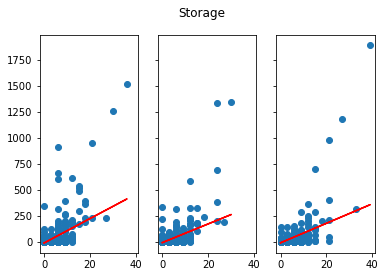

In [429]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,sharex=True,sharey=True)
fig.suptitle('Storage')
ax1.scatter(stor_Fac_2006, stor_Emp_2006)
ax1.plot(stor_Fac_2006,model_2006.coef_*stor_Fac_2006+model_2006.intercept_,'r')
ax2.scatter(stor_Fac_2013, stor_Emp_2013)
ax2.plot(stor_Fac_2013,model_2013.coef_*stor_Fac_2013+model_2013.intercept_,'r')
ax3.scatter(stor_Fac_2018, stor_Emp_2018)
ax3.plot(stor_Fac_2018,model_2018.coef_*stor_Fac_2018+model_2018.intercept_,'r')
